In [1]:
import pygrib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import shiftgrid
import numpy as np
from datetime import datetime

from scipy import interpolate

from pathlib import Path

In [3]:
import cdsapi
from tqdm import tqdm

c = cdsapi.Client()

print('getting data for {}...'.format(year))

c.retrieve(
'reanalysis-era5-land-monthly-means',
{
    'variable': '2m_temperature',
    'product_type': 'monthly_averaged_reanalysis',
    'year': [
        '1950', '1951', '1952',
        '1953', '1954', '1955',
        '1956', '1957', '1958',
        '1959', '1960', '1961',
        '1962', '1963', '1964',
        '1965', '1966', '1967',
        '1968', '1969', '1970',
        '1971', '1972', '1973',
        '1974', '1975', '1976',
        '1977', '1978', '1979',
        '1980', '1981', '1982',
        '1983', '1984', '1985',
        '1986', '1987', '1988',
        '1989', '1990', '1991',
        '1992', '1993', '1994',
        '1995', '1996', '1997',
        '1998', '1999', '2000',
        '2001', '2002', '2003',
        '2004', '2005', '2006',
        '2007', '2008', '2009',
        '2010', '2011', '2012',
        '2013', '2014', '2015',
        '2016', '2017', '2018',
        '2019', '2020', '2021',
        '2022',
    ],
    'month': [
        '01', '02', '03',
        '04', '05', '06',
        '07', '08', '09',
        '10', '11', '12',
    ],
    'format': 'grib',
    'time': '00:00',
    'area': [
        47, 13, 42,
        20,
    ],
},
'cro/cro_monthly_all.grib')


2023-01-22 17:17:18,344 INFO Welcome to the CDS
2023-01-22 17:17:18,345 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land-monthly-means


getting data for 1950...


2023-01-22 17:17:18,404 INFO Request is queued
2023-01-22 17:18:33,776 INFO Request is completed
2023-01-22 17:18:33,776 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data9/adaptor.mars.internal-1674407569.326566-25526-11-48cf818b-2593-4008-be98-ccfd0a265320.grib to cro/cro_monthly_all.grib (4.9M)
2023-01-22 17:18:34,829 INFO Download rate 4.7M/s   


Result(content_length=5150880,content_type=application/x-grib,location=https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data9/adaptor.mars.internal-1674407569.326566-25526-11-48cf818b-2593-4008-be98-ccfd0a265320.grib)

In [99]:
city = 'Zagreb'

if city == 'Čakovec':
    location = np.array([46.3897, 16.438]) # cakovec
elif city == 'Zagreb':
    location = np.array([45.8150, 15.9819]) # zagreb
elif city == 'Gospić':
    location = np.array([44.5469, 15.3750])
elif city == 'Hum':
    location = np.array([45.3491, 14.0494])
elif city == 'Sisak':
    location = np.array([45.4851, 16.3731])
elif city == 'Novi Marof':
    location = np.array([46.1669, 16.3353])
else:
    assert 0
    
dates = []
vals = []

glob_file = 'cro/cro_monthly_all.grib'

grbs = pygrib.open(str(glob_file))

grb_select = grbs.select()

for grb in grb_select:
    data = np.asarray(grb.values) - 273.15

    lons = np.linspace(float(grb['longitudeOfFirstGridPointInDegrees']), \
    float(grb['longitudeOfLastGridPointInDegrees']), int(grb['Ni']) )

    lats = np.linspace(float(grb['latitudeOfFirstGridPointInDegrees']), \
    float(grb['latitudeOfLastGridPointInDegrees']), int(grb['Nj']) )

    interpolated_value = interpolate.interpn((lats[::-1], lons), data[::-1, :], location, method='linear')

    date = datetime(day=grb['day'], month=grb['month'], year=grb['year']).date()

    vals.append(interpolated_value)
    dates.append(date)   
    

In [100]:
data_by_year = {}

for date, temp in zip(dates, vals):
    if date.year not in data_by_year:
        data_by_year[date.year] = []
    
    data_by_year[date.year].append((date, temp))

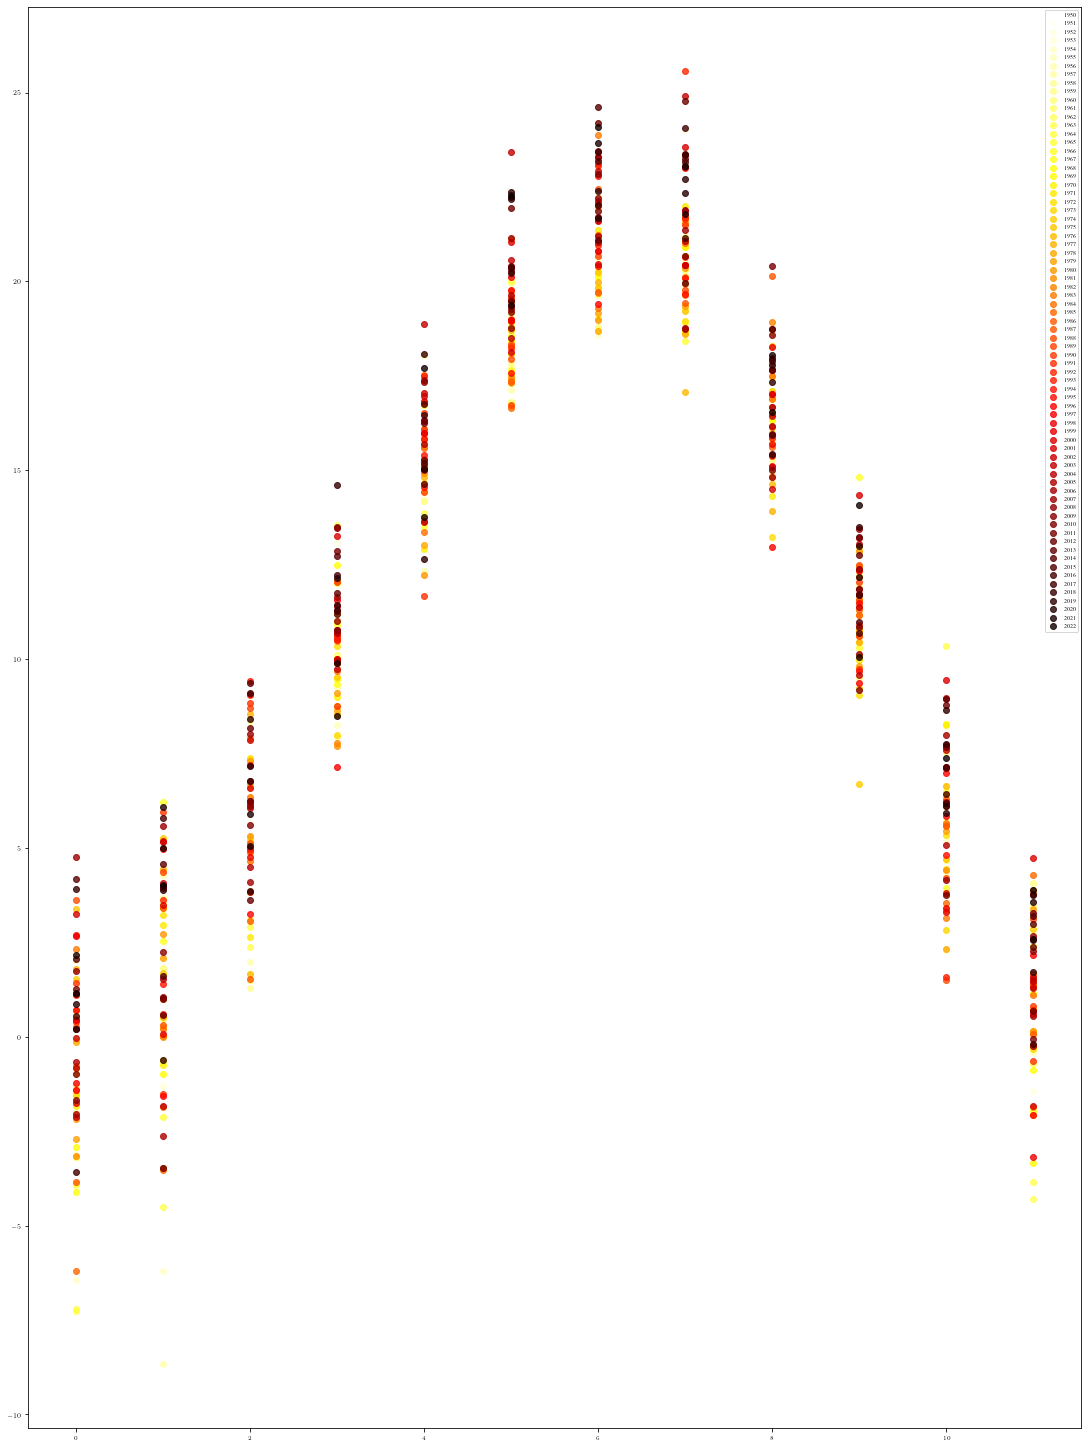

In [101]:
%matplotlib inline

from matplotlib import cm

fig, ax = plt.subplots(1, 1, figsize=(15, 20))

for i, year in enumerate(list(data_by_year.keys())):   
    ax.scatter(range(len(data_by_year[year])), [x[1] for x in data_by_year[year]], color=cm.hot_r(i / (len(data_by_year))), label=year, alpha=0.8)
    
    
ax.legend()

In [102]:
mean_data_by_year_and_month = {}

for date, temp in zip(dates, vals):
    if date.year not in mean_data_by_year_and_month:
        mean_data_by_year_and_month[date.year] = {}
    
    if date.month not in mean_data_by_year_and_month[date.year]:
        mean_data_by_year_and_month[date.year][date.month] = []
    
    mean_data_by_year_and_month[date.year][date.month] = temp
    

In [103]:
from tueplots import bundles

In [104]:
today = datetime.now()

print(datetime.strftime(today, '%d.%m.%Y.'))

22.01.2023.


<ipython-input-106-6ca538bb220e>:68: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


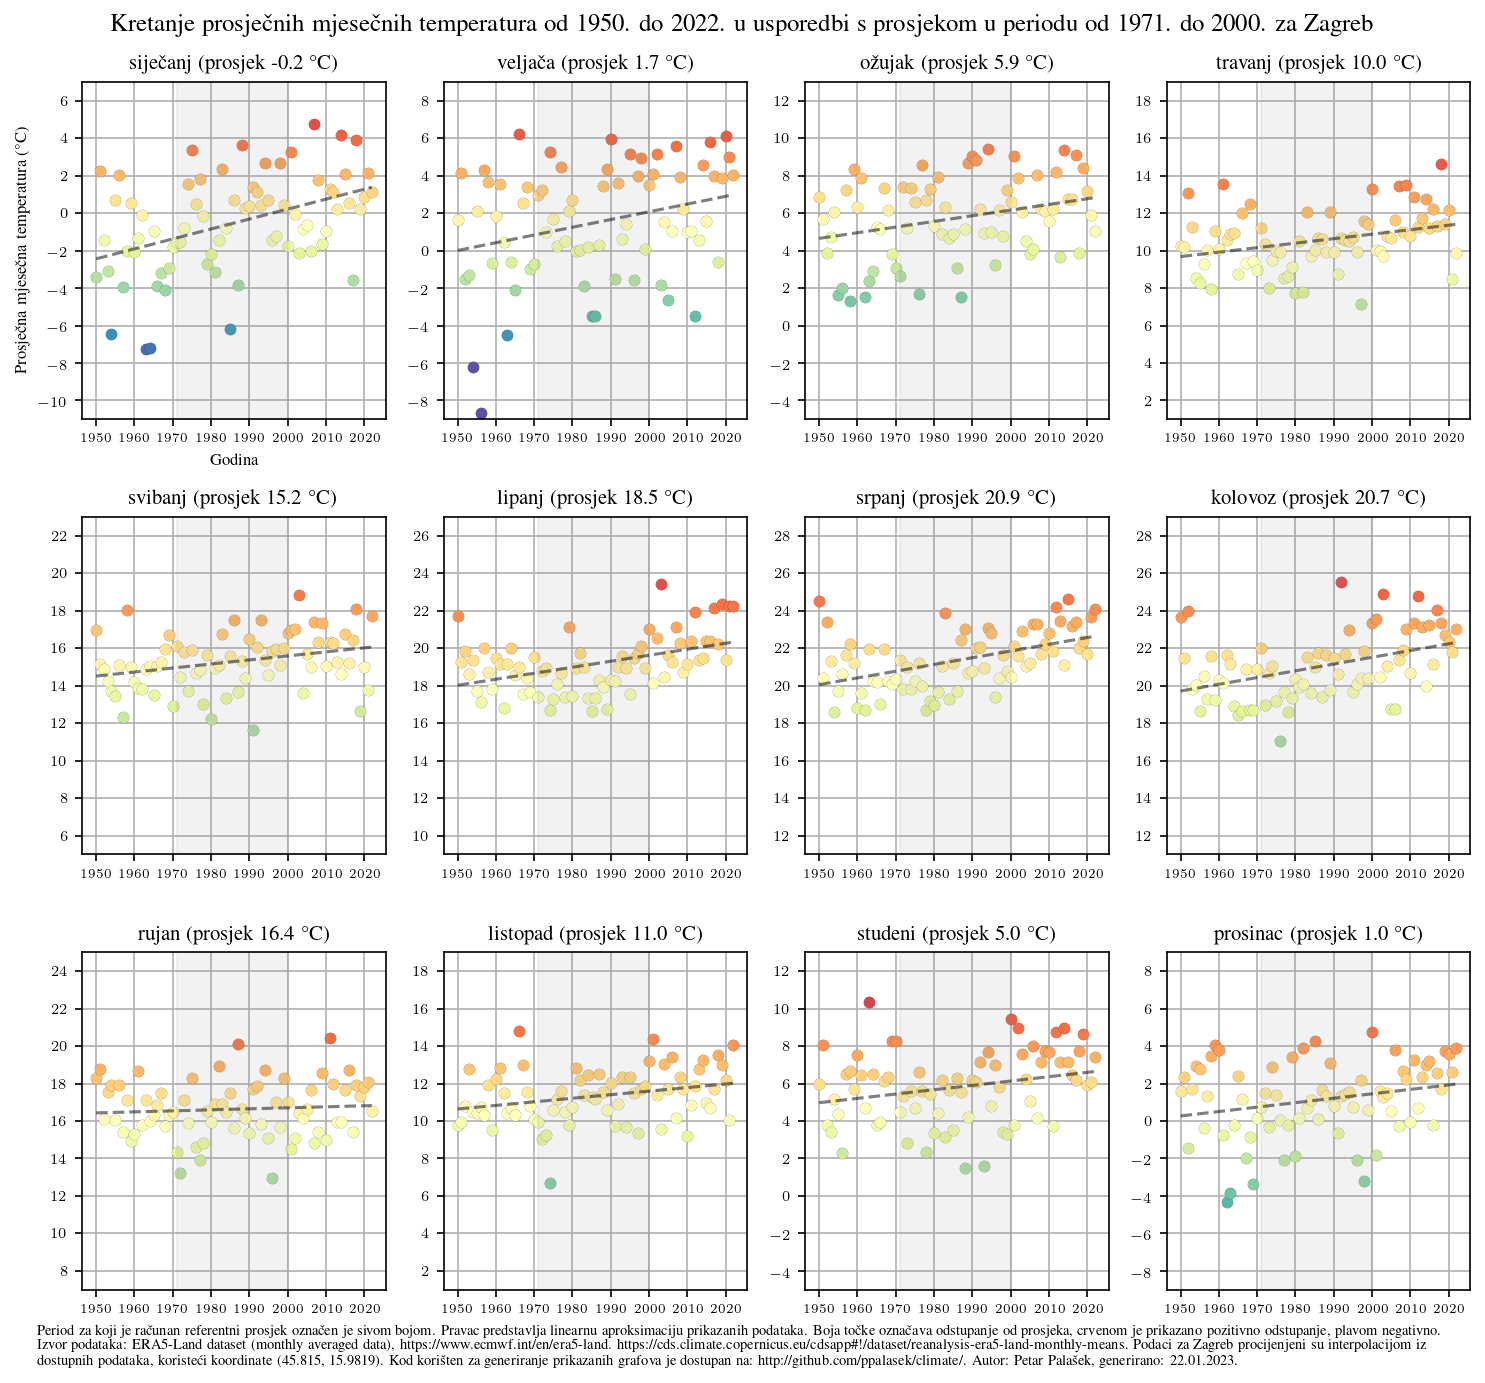

In [106]:
plt.rcParams.update(bundles.icml2022())
plt.rcParams.update({"figure.dpi": 150})
plt.rcParams.update({"font.size": 10})
plt.rcParams.update({"axes.titlesize": 10})

plt.rcParams.update({"xtick.labelsize": 6})
plt.rcParams.update({"ytick.labelsize": 7})

months = ['siječanj', 'veljača', 'ožujak', 'travanj', 'svibanj', 'lipanj', 'srpanj', 'kolovoz', 'rujan', 'listopad', 'studeni', 'prosinac']
 
fig, axs = plt.subplots(3, 4, figsize=(10, 9))

offset_y = 9

ref_start_year = 1971
ref_end_year = 2000


for month in range(1, 13):
    r = (month - 1) // 4
    c = (month - 1) % 4

    all_years = []
    all_years_for_mean = []
    
    
    axs[r, c].grid(True)
    
    for i, year in enumerate(mean_data_by_year_and_month):        
        if month in mean_data_by_year_and_month[year]:
            all_years.append(mean_data_by_year_and_month[year][month])
            
            if year > ref_start_year - 1 and year < ref_end_year + 1:
                all_years_for_mean.append(mean_data_by_year_and_month[year][month])

    all_years_mean = np.asarray(all_years_for_mean).mean()
    
    
    axs[r, c].axvspan(ref_start_year, ref_end_year, alpha=0.1, color='gray')
    axs[r, c].set_axisbelow(True)

    for i, year in enumerate(mean_data_by_year_and_month):        
        if month in mean_data_by_year_and_month[year]:                   
            axs[r, c].scatter(year, mean_data_by_year_and_month[year][month], color='black', alpha=0.5, s=21)
            axs[r, c].scatter(year, mean_data_by_year_and_month[year][month], color=cm.Spectral_r(((mean_data_by_year_and_month[year][month] - all_years_mean) + 8 )/15), s=20)
        
    x = np.asarray(range(len(all_years)))
                   
    a, b = np.polyfit(x, all_years, 1)
        
    axs[r, c].plot(x + 1950, a * x + b, color='black', linestyle='--', alpha=0.5)  

    axs[r, c].set_ylim(np.floor(all_years_mean / 2) * 2 - offset_y,
                       np.floor(all_years_mean / 2) * 2 + offset_y)

    if r == 0 and c == 0:
        axs[r, c].set_xlabel('Godina')
        axs[r, c].set_ylabel('Prosječna mjesečna temperatura (°C)')

    axs[r, c].title.set_text('{} (prosjek {:2.1f} °C)'.format(months[month - 1], all_years_mean))
      

fig.suptitle('Kretanje prosječnih mjesečnih temperatura od 1950. do 2022. u usporedbi s prosjekom u periodu od 1971. do 2000. za {}'.format(city))

txt = 'Period za koji je računan referentni prosjek označen je sivom bojom. Pravac predstavlja linearnu aproksimaciju prikazanih podataka. Boja točke označava odstupanje od prosjeka, crvenom je prikazano pozitivno odstupanje, plavom negativno.\nIzvor podataka: ERA5-Land dataset (monthly averaged data), https://www.ecmwf.int/en/era5-land. https://cds.climate.copernicus.eu/cdsapp\#!/dataset/reanalysis-era5-land-monthly-means. Podaci za {} procijenjeni su interpolacijom iz\ndostupnih podataka, koristeći koordinate ({}, {}). Kod korišten za generiranje prikazanih grafova je dostupan na: http://github.com/ppalasek/climate/. Autor: Petar Palašek, generirano: {}'.format(city, location[0], location[1], datetime.strftime(today, '%d.%m.%Y.'))
plt.figtext(0.03, -0.02, txt, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()

plt.savefig('monthly_image_{}_200.png'.format(city), dpi=200, transparent=False, bbox_inches='tight', facecolor="white")

plt.show()
